In [ ]:
# The change in weights and biases changes the output which in turn changes the amount of loss 
# and accuracy of a model
# So in other words we can say that the chnage in weights and biases changes loss/accuracy.
# So with regards to the earlier random optimizations that were used 
# we can totally understand how they were not always the best way of doing things.
# In here we will understand about derivatives,gradients,gradient descent, backpropagation.
# Basically we will calculate how much singular weight and bias changes the loss value to 
# decrease. Here our goal is to change the weights and biases for our loss value to decrease
# and we would do this by the help of gradient descent.

In [ ]:
# Gradient on the other hand is a result of the calculation of the partial derevatives
# and we'll backpropagate it using the chain rule to update all of the weights and biases.
# To understand partial derivatives we need to start with derivatives which are special cases
# of parital derivatives-they are calculated from functions taking single parameters.

[0 1 2 3 4]
[0 2 4 6 8]


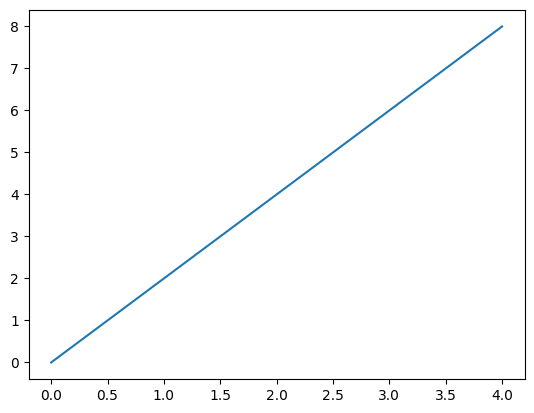

In [3]:
# Impact of a Parameter on the Output
import matplotlib.pyplot as plt
import numpy as np

# Simple function y=2x
def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)

print(x)
print(y)

plt.plot(x,y)
plt.show()

In [4]:
# Calculating the slope
# The slope of a line is: (change in y)/(change in x) = delta(y)/delta(x)
# so for the above example, the slope is
slope = (y[1]-y[0])/(x[1]-x[0])
print("Slope of the line = ",slope)
# so we can say the impact that x has on y is 2.

Slope of the line =  2.0


In [5]:
# What about nonlinear function like f(x) = 2x^2

def f(x):
    return 2*x**2
x = np.array(range(5))
y = f(x)

print(x)
print(y)

[0 1 2 3 4]
[ 0  2  8 18 32]


In [7]:
# Now lets test the slope for the first pair of points
slope1 = (y[1]-y[0])/(x[1]-x[0])
print("Slope between the first pair of points = ",slope1)
slope2 = (y[3]-y[2])/(x[3]-x[2])
print("Slope between the second pair of points = ",slope2)

Slope between the first pair of points =  2.0
Slope between the second pair of points =  10.0


In [9]:
# Here we can see that at each pair of points the slope changes drastically as the function is non-linear
# How will we get the slope at a point x.(instantaneous slope). To do that we find the derivative
# at that point.(It is nothing but the slope calculation between two "infinitely close" points on the curve).
# So for this example lets find out the slope with a very small delta = 0.0001

p2_delta = 0.00001

x1 = 1
x2 = x1 + p2_delta #add delta

y1 = f(x1)
y2 = f(x2)

slope = (y2-y1)/(x2-x1)
print("The slope at point x=1 for the curve y=2*x^2 = ",slope)


The slope at point x=1 for the curve y=2*x^2 =  4.000020000001655


In [10]:
# doing d/dx (2*x**2) at x=1 = 4 which is approx very near to the slope value we calculated.
# slope = 4.00002. We can't make the p2_delta = 0 as it would be illegal as y/0 is not a number.
# with more smaller values of p2_delta nearing 0 we will get some value near to 4.

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


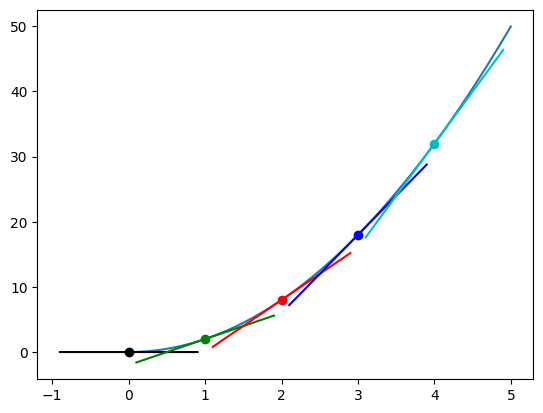

In [2]:
# The Numerical Derivative
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2
# np.arrange(start,stop,step) to give us smoother line
x = np.arange(0,5,0.001)
y = f(x)
colors = ['k','g','r','b','c']
plt.plot(x,y)
# def tangent_line(x):
#     return approximate_derivative*x + b
def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative*x) + b
    
for i in range(5):
    delta = 0.0001
    #Derivative at point x=i
    x1 = i
    x2 = x1+delta
    y1 = f(x1)
    y2 = f(x2)

    print((x1,y1), (x2,y2))
    # Derivative approximation and y-intercept for the tangent line
    approximate_derivative = (y2-y1)/(x2-x1)
    b = y2 - (approximate_derivative*x2)

    # We put the tangent line calculation into a func so we can call
    # it multiple times for different values of x
    # approximate_derivative and b are constant for a given function
    # thus calculated once above this function


    # Plot the tangent line
    to_plot = [x1-0.9, x1, x1+0.9]
    #Plot the y=f(x) function
    plt.scatter(x1,y1, c=colors[i])
    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point, approximate_derivative) for point in to_plot],
             c=colors[i])
    print('Approximate derivative for f(x)', f'where x = {x1} is {approximate_derivative}')
plt.show()

In [16]:
'''Doing Numerical Differentiation is not so simple when we are performing calculation for the loss function. The Loss Dunction contains all of the layers, Weights and biases. Calculating derivatives using numerical differentiation requires multiple forward passes for a single parameter update (we’ll talk about parameter updates in chapter 10). We need to perform the forward pass as a reference, then update a single parameter by the delta value and perform the forward pass through our model again to see the change of the loss value. Next, we need to calculate the derivative and revert the parameter change that we made for this calculation. We have to repeat this for every weight and bias and for every sample, which will be very time-consuming. We can also think of this method as brute-forcing the derivative calculations'''

'Doing Numerical Differentiation is not so simple when we are performing calculation for the loss function. The Loss Dunction contains all of the layers, Weights and biases. Calculating derivatives using numerical differentiation requires multiple forward passes for a single parameter update (we’ll talk about parameter updates in chapter 10). We need to perform the forward pass as a reference, then update a single parameter by the delta value and perform the forward pass through our model again to see the change of the loss value. Next, we need to calculate the derivative and revert the parameter change that we made for this calculation. We have to repeat this for every weight and bias and for every sample, which will be very time-consuming. We can also think of this method as brute-forcing the derivative calculations'

In [17]:
# The Analytical Derivative
'''We saw how to calculate the Neumerical Derivative(also called universal derivative) and why its not a good approach for us, we can move on to Analytical Derivative. Unlike the Numerical Method the Analytical Method offers the exact and much quicker solution without any approximation. However the complexity of finding through Analytical means can get complex although the Numerical Method has the same amount of complexity.'''

'We saw how to calculate the Neumerical Derivative(also called universal derivative) and why its not a good approach for us, we can move on to Analytical Derivative. Unlike the Numerical Method the Analytical Method offers the exact and much quicker solution without any approximation. However the complexity of finding through Analytical means can get complex although the Numerical Method has the same amount of complexity.'

In [21]:
# Some Differentiation Formulas
    #f(x) = 1    -> d/dx(f(x))  =  0
    # f(x) = x    -> d/dx(f(x))  =  1
    # f(x) = mx   -> d/dx(f(x))  =  m
    # f(X) = mx^n -> d/dx(f(x))  =  n*m*(x^n-1)
    # d/dx(f(x) + g(x)) = d/dx(f(x)) + d/dx(g(x))
    # d/dx(f(x) - g(x)) = d/dx(f(x)) - d/dx(g(x))